# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.utils import shuffle
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train, random_state=1)
X_valid, y_valid = shuffle(X_valid, y_valid, random_state=1)
X_test, y_test = shuffle(X_test, y_test, random_state=1)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
from sklearn import preprocessing
from tqdm import tqdm
# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
lb = preprocessing.LabelBinarizer()
n_classes = len(lb.fit(y_train).classes_)


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

(array([ 180., 1980., 2010., 1260., 1770., 1650.,  360., 1290., 1260.,
        1320., 1800., 1170., 1890., 1920.,  690.,  540.,  360.,  990.,
        1080.,  180.,  300.,  270.,  330.,  450.,  240., 1350.,  540.,
         210.,  480.,  240.,  390.,  690.,  210.,  599.,  360., 1080.,
         330.,  180., 1860.,  270.,  300.,  420.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42.]),
 <a list of 42 Patch objects>)

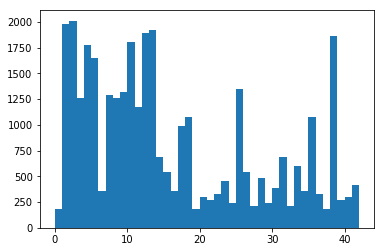

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(y_train, bins=42)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

def grayscale(images):
    img_num = images.shape[0]
    images_gray= []
    for i in range(img_num):
        image = images[i]
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_gray.append(img_gray)
    return images_gray

# Generalize the images
def normalize(images):
    images_norm = []
    for image in images:
        image = image.astype(np.float32)
        element_mean = np.mean(image)
        element_std = np.std(image)
        images_norm.append(((image-element_mean)/element_std).reshape([32,32,1]))
    return images_norm

In [5]:
# Preprocess the images
X_train_norm = normalize(grayscale(X_train))
X_valid_norm = normalize(grayscale(X_valid))
X_test_norm = normalize(grayscale(X_test))
# Binarize the labels
y_train_bn = lb.fit_transform(y_train)
y_valid_bn = lb.fit_transform(y_valid)
y_test_bn = lb.fit_transform(y_test)

In [6]:
lb.fit(y_train).classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

### Model Architecture

In [7]:
import tensorflow as tf

# Define the conv layer
def conv(input_layer, kernal_size, filter_num, padding='valid'):
    conv = tf.layers.conv2d(
        inputs=input_layer,
        filters=filter_num, 
        kernel_size=[kernal_size, kernal_size],
        padding=padding,
        activation=tf.nn.relu)
    return conv

# Define the pooling layer
def pool(inputs, pool_size, strides):
    pool = tf.layers.max_pooling2d(inputs=inputs, pool_size=[pool_size, pool_size], strides=strides)
    return pool

# Define the fully connected layer
def fc(inputs, units, activation='on'):
    if activation == 'on':
        fc = tf.layers.dense(inputs=inputs, units=units, activation=tf.nn.relu)
    else:
        fc = tf.layers.dense(inputs=inputs, units=units)
    return fc

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
# Define the architecture of the LeNet
def LeNet(features, keep_prob): 
    conv1 = conv(features, 5, 6)
    pool1 = pool(conv1, 2, 2)
    conv2 = conv(pool1, 5, 10)
    pool2 = pool(conv2, 2, 2)
    conv3 = conv(pool2, 5, 120)
    conv3_flat = tf.reshape(conv3, [-1, 120])
    fc1 = fc(conv3_flat, 84)
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    fc2 = fc(fc1, 43, activation='off')
    return fc2

In [9]:
def MyNet(features, keep_prob): 
    conv1 = conv(features, 1, 32, padding='same') #[？,32,32,32]
    conv1 = conv(conv1, 3, 32, padding='same')    #[？,32,32,32]
    conv1 = conv(conv1, 3, 32, padding='same')    #[？,32,32,32]
    conv1 = conv(conv1, 3, 32, padding='same')    #[？,32,32,32]    
    pool1 = pool(conv1, 2, 2)                     #[？,16,16,32]
    conv2 = conv(pool1, 3, 32, padding='same')    #[？,16,16,32]
    conv2 = conv(conv2, 3, 32, padding='same')    #[？,16,16,32]
    conv2 = conv(conv2, 3, 32, padding='same')    #[？,16,16,32]
    pool2 = pool(conv2, 2, 2)                     #[？,8,8,32]
    conv3 = conv(pool2, 3, 32, padding='same')    #[？,8,8,32]
    conv3 = conv(pool2, 3, 32, padding='same')    #[？,8,8,32]
    conv3 = conv(conv3, 3, 32, padding='same')    #[？,8,8,32]
    pool3 = pool(conv3, 2, 2)                     #[？,4,4,32]
    conv4 = conv(pool3, 4, 512)
    conv4_flat = tf.reshape(conv4, [-1, 512])
    conv4_flat = tf.nn.dropout(conv4_flat, keep_prob=keep_prob)
    fc1 = fc(conv4_flat, 120)
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    fc2 = fc(fc1, 43, activation='off')
    return fc2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
# LeNet with dropout layer
tf.reset_default_graph()
features = tf.placeholder(tf.float32, shape=[None, 32, 32,1])
labels = tf.placeholder(tf.float32, shape=[None, 43])
keep_prob = tf.placeholder(tf.float32, shape=[])
logits = LeNet(features, keep_prob)
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(
    onehot_labels=labels, logits=logits))
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
epoches = 201
batchsize = 500
save_file = './model_save/LeNet.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epoches):
        for batch_start in range(0, n_train, batchsize):
            batch_features = X_train_norm[batch_start:batch_start + batchsize]
            batch_labels = y_train_bn[batch_start:batch_start + batchsize]
            sess.run(optimizer, feed_dict={features:batch_features, labels:batch_labels, keep_prob: 0.3 })
        if i%10 == 0:
            test_accuracy = sess.run(accuracy, feed_dict={features: X_test_norm, labels: y_test_bn, keep_prob: 1.0})
            valid_accuracy = sess.run(accuracy, feed_dict={features: X_valid_norm, labels: y_valid_bn, keep_prob: 1.0})
            print('Epoch {} - Validation Accuracy: {}, Test_accuracy: {}'.format(i,valid_accuracy,test_accuracy))
    saver.save(sess, save_file)

Epoch 0 - Validation Accuracy: 0.4344671070575714, Test_accuracy: 0.4542359411716461
Epoch 10 - Validation Accuracy: 0.9090703129768372, Test_accuracy: 0.9018210768699646
Epoch 20 - Validation Accuracy: 0.9303854703903198, Test_accuracy: 0.9199525117874146
Epoch 30 - Validation Accuracy: 0.942630410194397, Test_accuracy: 0.9273951053619385
Epoch 40 - Validation Accuracy: 0.9419501423835754, Test_accuracy: 0.9294536709785461
Epoch 50 - Validation Accuracy: 0.9464852809906006, Test_accuracy: 0.9319873452186584
Epoch 60 - Validation Accuracy: 0.9503401517868042, Test_accuracy: 0.9304038286209106
Epoch 70 - Validation Accuracy: 0.9462584853172302, Test_accuracy: 0.929057776927948
Epoch 80 - Validation Accuracy: 0.9503401517868042, Test_accuracy: 0.9333333373069763
Epoch 90 - Validation Accuracy: 0.9519274234771729, Test_accuracy: 0.931908130645752
Epoch 100 - Validation Accuracy: 0.9514739513397217, Test_accuracy: 0.9315914511680603
Epoch 110 - Validation Accuracy: 0.9519274234771729, Test

In [10]:
# MyNet 
# Pretrain the model
tf.reset_default_graph()
features = tf.placeholder(tf.float32, shape=[None, 32, 32, 1])
labels = tf.placeholder(tf.float32, shape=[None, 43])
keep_prob = tf.placeholder(tf.float32, shape=[])
logits = MyNet(features, keep_prob)
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(
    onehot_labels=labels, logits=logits))
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
epoches = 201
batchsize = 500
save_file = './model_save/MyNet.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epoches):
        for batch_start in range(0, n_train, batchsize):
            batch_features = X_train_norm[batch_start:batch_start + batchsize]
            batch_labels = y_train_bn[batch_start:batch_start + batchsize]
            sess.run(optimizer, feed_dict={features:batch_features, labels:batch_labels, keep_prob: 0.3 })
        if i%20== 0:
            test_accuracy = sess.run(accuracy, feed_dict={features: X_test_norm, labels: y_test_bn, keep_prob: 1.0})
            valid_accuracy = sess.run(accuracy, feed_dict={features: X_valid_norm, labels: y_valid_bn, keep_prob: 1.0})
            print('Epoch {} - Validation Accuracy: {}, Test_accuracy: {}'.format(i,valid_accuracy,test_accuracy))
    saver.save(sess, save_file)

Epoch 0 - Validation Accuracy: 0.24875283241271973, Test_accuracy: 0.26215359568595886
Epoch 20 - Validation Accuracy: 0.9827664494514465, Test_accuracy: 0.957878053188324
Epoch 40 - Validation Accuracy: 0.981632649898529, Test_accuracy: 0.9612034559249878
Epoch 60 - Validation Accuracy: 0.9789115786552429, Test_accuracy: 0.965716540813446
Epoch 80 - Validation Accuracy: 0.983900249004364, Test_accuracy: 0.9707838296890259
Epoch 100 - Validation Accuracy: 0.9807256460189819, Test_accuracy: 0.9626286625862122
Epoch 120 - Validation Accuracy: 0.9877551198005676, Test_accuracy: 0.9710213541984558
Epoch 140 - Validation Accuracy: 0.9897959232330322, Test_accuracy: 0.9745843410491943
Epoch 160 - Validation Accuracy: 0.9811791181564331, Test_accuracy: 0.9695962071418762
Epoch 180 - Validation Accuracy: 0.9850339889526367, Test_accuracy: 0.9704671502113342
Epoch 200 - Validation Accuracy: 0.9857142567634583, Test_accuracy: 0.967695951461792


In [11]:
# MyNet 
# Retrain the model and save the best one
# Change the number of epoches and train the model for several rounds
tf.reset_default_graph()
features = tf.placeholder(tf.float32, shape=[None, 32, 32,1])
labels = tf.placeholder(tf.float32, shape=[None, 43])
keep_prob = tf.placeholder(tf.float32, shape=[])
logits = MyNet(features, keep_prob)
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(
    onehot_labels=labels, logits=logits))
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
epoches = 201
batchsize = 500
cache_accuracy = 0.0
save_file = './model_save/MyNet.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    # sess.run(tf.global_variables_initializer())
    saver.restore(sess, save_file)
    n = 0
    for i in range(epoches):
        for batch_start in range(0, n_train, batchsize):
            batch_features = X_train_norm[batch_start:batch_start + batchsize]
            batch_labels = y_train_bn[batch_start:batch_start + batchsize]
            sess.run(optimizer, feed_dict={features:batch_features, labels:batch_labels, keep_prob: 0.3 })
        if i%1 == 0:
            test_accuracy = sess.run(accuracy, feed_dict={features: X_test_norm, labels: y_test_bn, keep_prob: 1.0})
            valid_accuracy = sess.run(accuracy, feed_dict={features: X_valid_norm, labels: y_valid_bn, keep_prob: 1.0})
            print('Epoch {} - Validation Accuracy: {}, Test_accuracy: {}'.format(i,valid_accuracy,test_accuracy))
            if n == 0:
                saver.save(sess, save_file)
                n = n+1
                cache_accuracy = test_accuracy
                print('Model saved', test_accuracy)
            else:
                if test_accuracy>cache_accuracy:
                    saver.save(sess, save_file)
                    cache_accuracy = test_accuracy
                    print('Model saved', test_accuracy)

INFO:tensorflow:Restoring parameters from ./model_save/MyNet.ckpt
Epoch 0 - Validation Accuracy: 0.9850339889526367, Test_accuracy: 0.9733966588973999
Model saved 0.97339666
Epoch 1 - Validation Accuracy: 0.9825396537780762, Test_accuracy: 0.9684877395629883
Epoch 2 - Validation Accuracy: 0.9825396537780762, Test_accuracy: 0.9690419435501099
Epoch 3 - Validation Accuracy: 0.9841269850730896, Test_accuracy: 0.974901020526886
Model saved 0.974901
Epoch 4 - Validation Accuracy: 0.9850339889526367, Test_accuracy: 0.9730007648468018
Epoch 5 - Validation Accuracy: 0.9841269850730896, Test_accuracy: 0.9733175039291382
Epoch 6 - Validation Accuracy: 0.9859410524368286, Test_accuracy: 0.9715756177902222
Epoch 7 - Validation Accuracy: 0.9850339889526367, Test_accuracy: 0.97315913438797
Epoch 8 - Validation Accuracy: 0.9852607846260071, Test_accuracy: 0.9755344390869141
Model saved 0.97553444
Epoch 9 - Validation Accuracy: 0.9786847829818726, Test_accuracy: 0.9627870321273804
Epoch 10 - Validatio

Epoch 95 - Validation Accuracy: 0.9870748519897461, Test_accuracy: 0.9714964628219604
Epoch 96 - Validation Accuracy: 0.9870748519897461, Test_accuracy: 0.9711005687713623
Epoch 97 - Validation Accuracy: 0.9861677885055542, Test_accuracy: 0.9663499593734741
Epoch 98 - Validation Accuracy: 0.9904761910438538, Test_accuracy: 0.9717339873313904
Epoch 99 - Validation Accuracy: 0.9857142567634583, Test_accuracy: 0.9682502150535583
Epoch 100 - Validation Accuracy: 0.9916099905967712, Test_accuracy: 0.9721298217773438
Epoch 101 - Validation Accuracy: 0.9897959232330322, Test_accuracy: 0.9700712561607361
Epoch 102 - Validation Accuracy: 0.9904761910438538, Test_accuracy: 0.9698337316513062
Epoch 103 - Validation Accuracy: 0.9832199811935425, Test_accuracy: 0.9697545766830444
Epoch 104 - Validation Accuracy: 0.9854875206947327, Test_accuracy: 0.9673000574111938
Epoch 105 - Validation Accuracy: 0.9848072528839111, Test_accuracy: 0.9722090363502502
Epoch 106 - Validation Accuracy: 0.9886621236801

Epoch 189 - Validation Accuracy: 0.9841269850730896, Test_accuracy: 0.9699128866195679
Epoch 190 - Validation Accuracy: 0.9827664494514465, Test_accuracy: 0.96856689453125
Epoch 191 - Validation Accuracy: 0.9789115786552429, Test_accuracy: 0.9653206467628479
Epoch 192 - Validation Accuracy: 0.9743764400482178, Test_accuracy: 0.9564529061317444
Epoch 193 - Validation Accuracy: 0.9764172434806824, Test_accuracy: 0.9653998613357544
Epoch 194 - Validation Accuracy: 0.9818593859672546, Test_accuracy: 0.967695951461792
Epoch 195 - Validation Accuracy: 0.9786847829818726, Test_accuracy: 0.9709421992301941
Epoch 196 - Validation Accuracy: 0.9834467172622681, Test_accuracy: 0.97292160987854
Epoch 197 - Validation Accuracy: 0.9843537211418152, Test_accuracy: 0.9732383489608765
Epoch 198 - Validation Accuracy: 0.9854875206947327, Test_accuracy: 0.9717339873313904
Epoch 199 - Validation Accuracy: 0.9850339889526367, Test_accuracy: 0.97315913438797
Epoch 200 - Validation Accuracy: 0.986848056316375

In [12]:
# Calculate the accuracy of train dataset, validation dataset and test dataset
tf.reset_default_graph()
features = tf.placeholder(tf.float32, shape=[None, 32, 32, 1])
labels = tf.placeholder(tf.float32, shape=[None, 43])
keep_prob = tf.placeholder(tf.float32, shape=[])
logits = MyNet(features, keep_prob)
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(
    onehot_labels=labels, logits=logits))
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
batchsize = 5000
n = 0
cache_accuracy = 0.0
train_accuracy = []
save_file = './model_save/MyNet.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    # sess.run(tf.global_variables_initializer())
    saver.restore(sess, save_file)
    for batch_start in range(0, n_train, batchsize):
        batch_features = X_train_norm[batch_start:batch_start + batchsize]
        batch_labels = y_train_bn[batch_start:batch_start + batchsize]
        train_accuracy.append(sess.run(accuracy, feed_dict={features:batch_features, labels:batch_labels, keep_prob: 1.0 }))
    test_accuracy = sess.run(accuracy, feed_dict={features: X_test_norm, labels: y_test_bn, keep_prob: 1.0})
    valid_accuracy = sess.run(accuracy, feed_dict={features: X_valid_norm, labels: y_valid_bn, keep_prob: 1.0})
    print('Train Accuracy: {}, Validation Accuracy: {}, Test_accuracy: {}'.format(np.mean(train_accuracy),valid_accuracy,test_accuracy))

INFO:tensorflow:Restoring parameters from ./model_save/MyNet.ckpt
Train Accuracy: 1.0, Validation Accuracy: 0.9879818558692932, Test_accuracy: 0.9768012762069702


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image
import os

def img_read_resize(image_dir):
    image_files=[f for f in os.listdir(image_dir) if f[-3:] == 'png']
    image_list=[]
    for f in image_files:
        im = Image.open(image_dir + f)
        im = im.resize([32,32])
        image_list.append(np.array(im))
    return image_list

image_list=img_read_resize('./Sample_images/')

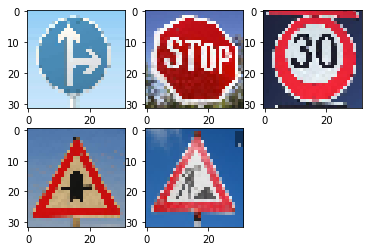

In [14]:
for i in range(len(image_list)):
    plt.subplot(2,3,i+1)
    plt.imshow(image_list[i])

### Predict the Sign Type for Each Image

In [15]:
image_gray_list = []
for i in range(len(image_list)):
    image = cv2.cvtColor(image_list[i], cv2.COLOR_RGB2GRAY).reshape([32,32,1])
    image_gray_list.append(image)
img_norm_gray = normalize(image_gray_list)

INFO:tensorflow:Restoring parameters from ./model_save/MyNet.ckpt
CLASS: 36
CLASS: 14
CLASS: 1
CLASS: 11
CLASS: 25


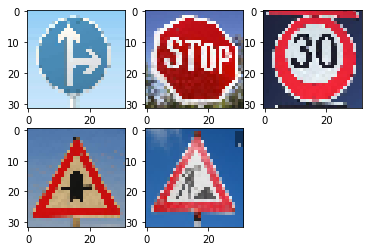

In [16]:
tf.reset_default_graph()
features = tf.placeholder(tf.float32, shape=[None, 32, 32, 1])
labels = tf.placeholder(tf.float32, shape=[None, 43])
keep_prob = tf.placeholder(tf.float32, shape=[])
logits = MyNet(features, keep_prob)
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(
    onehot_labels=labels, logits=logits))
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
save_file = './model_save/MyNet.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_file)
    for i in range(len(image_list)):
        plt.subplot(2,3,i+1)
        plt.imshow(image_list[i])
    for image in img_norm_gray:
        test_accuracy = sess.run(tf.nn.softmax(logits), feed_dict={features: image.reshape([1,32,32,1]), keep_prob: 1.0})
        print('CLASS: {}'.format(np.argmax(test_accuracy)))
        #print('CLASS: {}'.format(test_accuracy))

### Analyze Performance

The model gives correct calssifications for image 1, 3 and 5. 
The classes of image 2 and 4 are not contained in the training data set and the model gives the results whose geometries are similar to the test images. 

For the known classes, the accuracy is 100%. And the overall accuracy for this test is 60%. 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./model_save/MyNet.ckpt
class: [[36 34 17 28 24]], Probability: [[9.9997818e-01 1.9610003e-05 1.1300134e-06 3.5438489e-07 2.3833722e-07]]
class: [[14  8 34 13  1]], Probability: [[1.0000000e+00 7.4234903e-09 2.8897824e-09 2.2151028e-09 1.2220085e-09]]
class: [[ 1 39  0 38  2]], Probability: [[9.9973410e-01 1.1173737e-04 5.1527208e-05 4.9891849e-05 3.2953834e-05]]
class: [[11 31 17 18 10]], Probability: [[1.0000000e+00 1.3826030e-28 5.1094927e-29 7.9245788e-30 3.0285087e-30]]
class: [[25 38 24 31 18]], Probability: [[1.0000000e+00 1.4152221e-22 1.9554402e-24 1.8165970e-24 4.8543843e-25]]


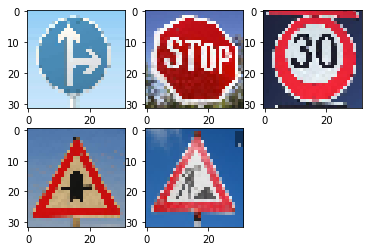

In [17]:
tf.reset_default_graph()
features = tf.placeholder(tf.float32, shape=[None, 32, 32, 1])
labels = tf.placeholder(tf.float32, shape=[None, 43])
keep_prob = tf.placeholder(tf.float32, shape=[])
logits = MyNet(features, keep_prob)
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(
    onehot_labels=labels, logits=logits))
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
save_file = './model_save/MyNet.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_file)
    for i in range(len(image_list)):
        plt.subplot(2,3,i+1)
        plt.imshow(image_list[i])
    for image in img_norm_gray:
        test_accuracy = sess.run(tf.nn.softmax(logits), feed_dict={features: image.reshape([1,32,32,1]), keep_prob: 1.0})
        print('class: {}, Probability: {}'.format(sess.run(tf.nn.top_k(test_accuracy, 5).indices), sess.run(tf.nn.top_k(test_accuracy, 5).values)))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [18]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={features : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(4,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./model_save/MyNet.ckpt


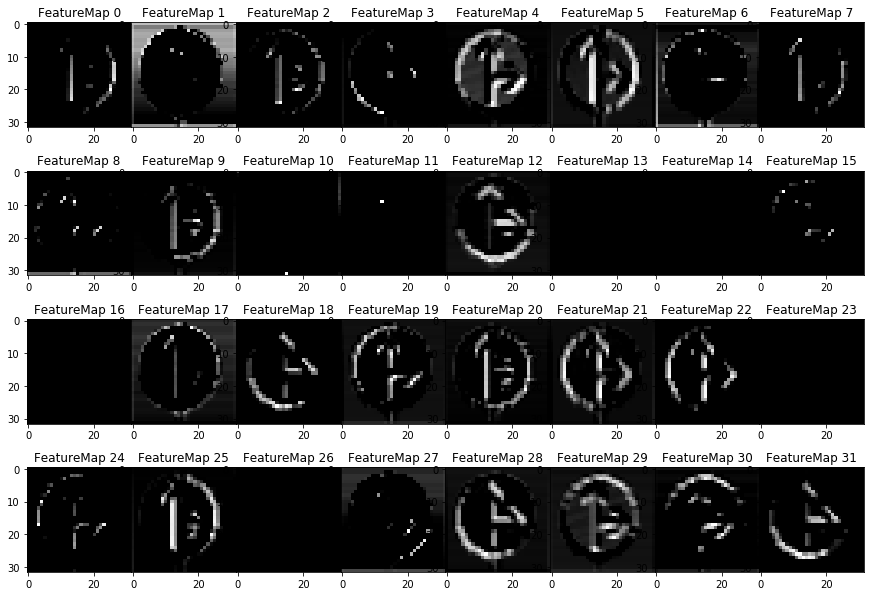

In [19]:
tf.reset_default_graph()
features = tf.placeholder(tf.float32, shape=[None, 32, 32, 1])
labels = tf.placeholder(tf.float32, shape=[None, 43])
keep_prob = tf.placeholder(tf.float32, shape=[])
# nn
conv1 = conv(features, 1, 32, padding='same') #[？,32,32,32]
conv1_1 = conv(conv1, 3, 32, padding='same')    #[？,32,32,32]
conv1_2 = conv(conv1_1, 3, 32, padding='same')    #[？,32,32,32]
conv1_3 = conv(conv1_2, 3, 32, padding='same')    #[？,32,32,32]    
pool1 = pool(conv1_3, 2, 2)                     #[？,16,16,32]
conv2 = conv(pool1, 3, 32, padding='same')    #[？,16,16,32]
conv2 = conv(conv2, 3, 32, padding='same')    #[？,16,16,32]
conv2 = conv(conv2, 3, 32, padding='same')    #[？,16,16,32]
pool2 = pool(conv2, 2, 2)                     #[？,8,8,32]
conv3 = conv(pool2, 3, 32, padding='same')    #[？,8,8,32]
conv3 = conv(pool2, 3, 32, padding='same')    #[？,8,8,32]
conv3 = conv(conv3, 3, 32, padding='same')    #[？,8,8,32]
pool3 = pool(conv3, 2, 2)                     #[？,4,4,32]
conv4 = conv(pool3, 4, 512)
conv4_flat = tf.reshape(conv4, [-1, 512])
conv4_flat = tf.nn.dropout(conv4_flat, keep_prob=keep_prob)
fc1 = fc(conv4_flat, 120)
fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
logits = fc(fc1, 43, activation='off')
######
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(
    onehot_labels=labels, logits=logits))
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
save_file = './model_save/MyNet.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    # sess.run(tf.global_variables_initializer())
    saver.restore(sess, save_file)
    outputFeatureMap(img_norm_gray[0].reshape([1,32,32,1]), conv1_1)
    plt.subplots_adjust(wspace=0, hspace=-0.6)

INFO:tensorflow:Restoring parameters from ./model_save/MyNet.ckpt


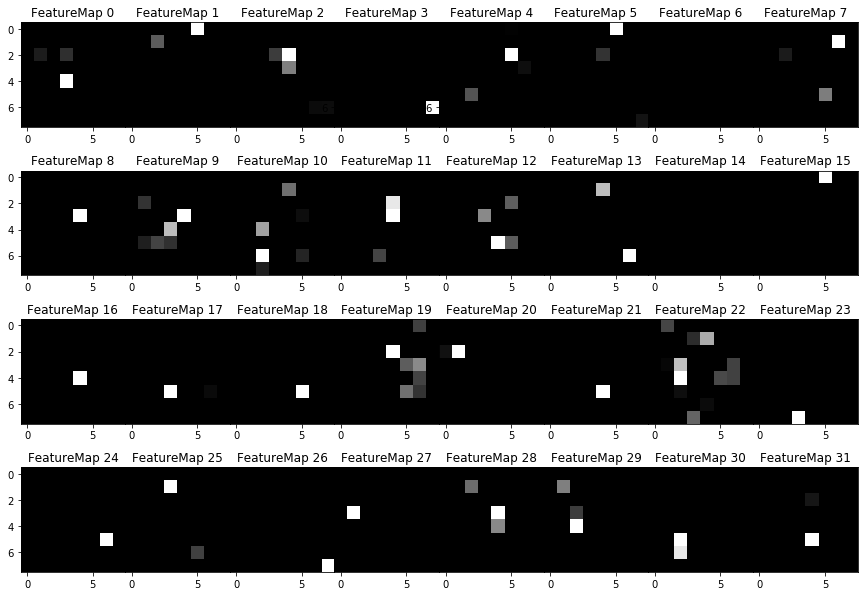

In [20]:
tf.reset_default_graph()
features = tf.placeholder(tf.float32, shape=[None, 32, 32, 1])
labels = tf.placeholder(tf.float32, shape=[None, 43])
keep_prob = tf.placeholder(tf.float32, shape=[])
# nn
conv1 = conv(features, 1, 32, padding='same') #[？,32,32,32]
conv1_1 = conv(conv1, 3, 32, padding='same')    #[？,32,32,32]
conv1_2 = conv(conv1_1, 3, 32, padding='same')    #[？,32,32,32]
conv1_3 = conv(conv1_2, 3, 32, padding='same')    #[？,32,32,32]    
pool1 = pool(conv1_3, 2, 2)                     #[？,16,16,32]
conv2 = conv(pool1, 3, 32, padding='same')    #[？,16,16,32]
conv2 = conv(conv2, 3, 32, padding='same')    #[？,16,16,32]
conv2 = conv(conv2, 3, 32, padding='same')    #[？,16,16,32]
pool2 = pool(conv2, 2, 2)                     #[？,8,8,32]
conv3 = conv(pool2, 3, 32, padding='same')    #[？,8,8,32]
conv3 = conv(pool2, 3, 32, padding='same')    #[？,8,8,32]
conv3 = conv(conv3, 3, 32, padding='same')    #[？,8,8,32]
pool3 = pool(conv3, 2, 2)                     #[？,4,4,32]
conv4 = conv(pool3, 4, 512)
conv4_flat = tf.reshape(conv4, [-1, 512])
conv4_flat = tf.nn.dropout(conv4_flat, keep_prob=keep_prob)
fc1 = fc(conv4_flat, 120)
fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
logits = fc(fc1, 43, activation='off')
######
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(
    onehot_labels=labels, logits=logits))
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
save_file = './model_save/MyNet.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    # sess.run(tf.global_variables_initializer())
    saver.restore(sess, save_file)
    outputFeatureMap(img_norm_gray[0].reshape([1,32,32,1]), conv3)
    plt.subplots_adjust(wspace=0, hspace=-0.6)